In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
dados = pd.read_csv('Consumo_cerveja.csv', decimal=",")

In [ ]:
dados.columns[:-1]

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana'],
      dtype='object')

##### Tratando os dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    int64  
 6   Consumo de cerveja (litros)  365 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.1+ KB


In [ ]:
dados['Consumo de cerveja (litros)'] = dados['Consumo de cerveja (litros)'].astype(float)

In [ ]:
dados.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [ ]:
dados.dropna(inplace=True)

In [ ]:
dados.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [ ]:
dados.describe()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


In [ ]:
del dados['Data']

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
X_dados = dados.iloc[:, [0, 1, 2, 3, 4]]
y_dados = dados.iloc[:, -1].values

#normalizando os dados
#Classe utilizada para transformar os dados em intervalos especificos
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

#normaliza os dados no intervalo de 0 e 1
scaler = MinMaxScaler()
scaler.fit(X_dados)
X_dados_norm = scaler.fit_transform(X_dados)

In [ ]:
df = pd.DataFrame(X_dados_norm, columns=dados.columns[:-1])

In [ ]:
df

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
0,0.902256,0.956835,0.818182,0.000000,0.0
1,0.884712,1.000000,0.863636,0.000000,0.0
2,0.746867,0.848921,0.700000,0.000000,1.0
3,0.694236,0.784173,0.640909,0.012658,1.0
4,0.684211,0.748201,0.627273,0.000000,0.0
...,...,...,...,...,...
360,0.695489,0.755396,0.622727,0.143460,1.0
361,0.610276,0.755396,0.554545,0.000000,0.0
362,0.550125,0.697842,0.436364,0.108650,0.0
363,0.531328,0.625899,0.359091,0.066456,0.0


In [ ]:
df['target'] = y_dados

In [ ]:
df

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,target
0,0.902256,0.956835,0.818182,0.000000,0.0,25.461
1,0.884712,1.000000,0.863636,0.000000,0.0,28.972
2,0.746867,0.848921,0.700000,0.000000,1.0,30.814
3,0.694236,0.784173,0.640909,0.012658,1.0,29.799
4,0.684211,0.748201,0.627273,0.000000,0.0,28.900
...,...,...,...,...,...,...
360,0.695489,0.755396,0.622727,0.143460,1.0,32.307
361,0.610276,0.755396,0.554545,0.000000,0.0,26.095
362,0.550125,0.697842,0.436364,0.108650,0.0,22.309
363,0.531328,0.625899,0.359091,0.066456,0.0,20.467


#### Conhecendo os dados

In [ ]:
##correlação
corr = df.corr()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

<Axes: >

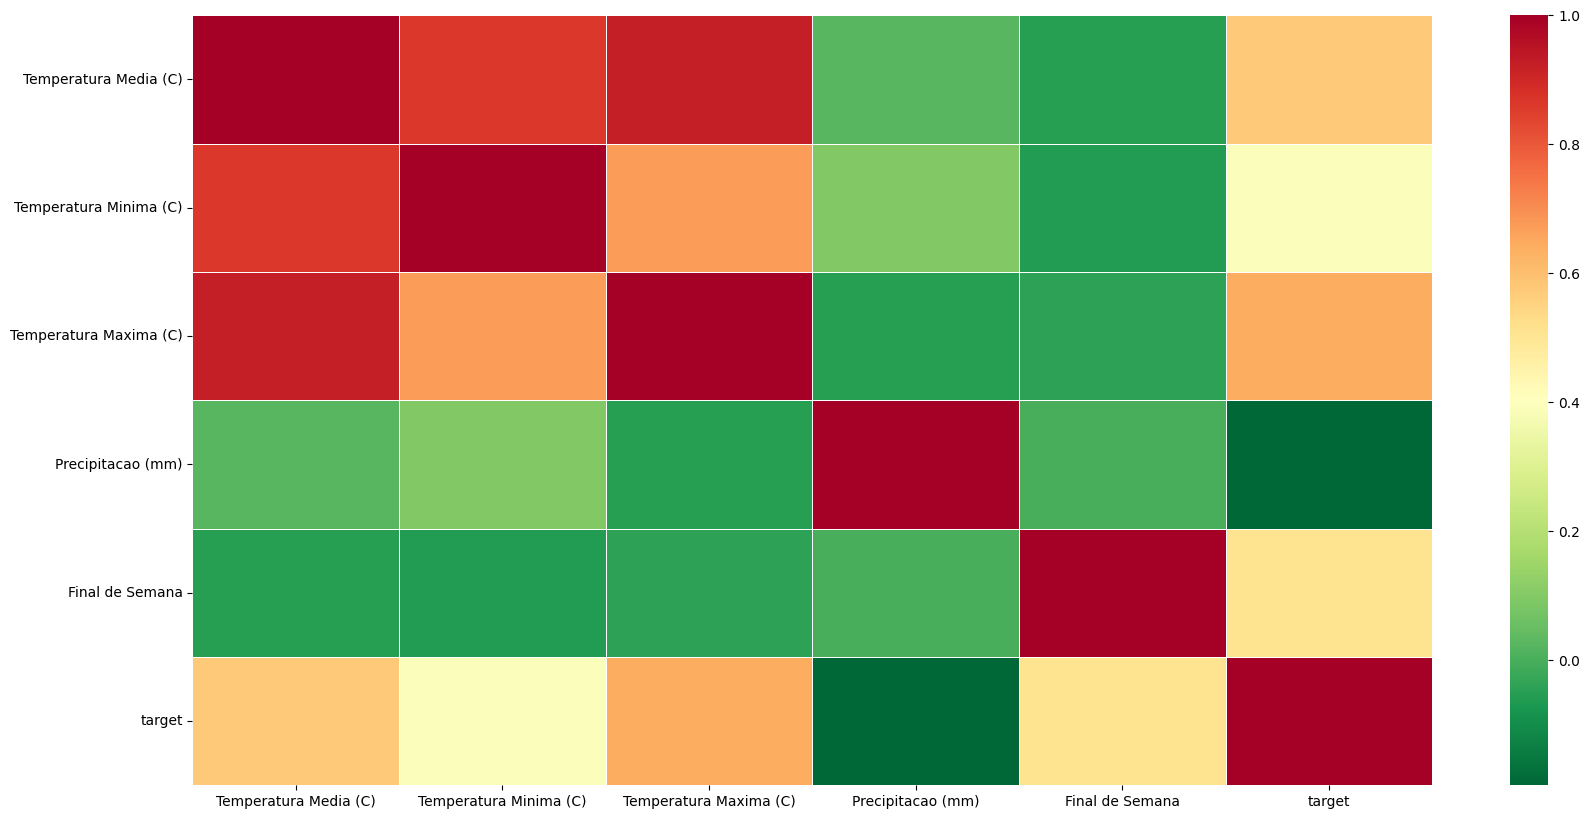

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='RdYlGn_r', linewidths=0.5)

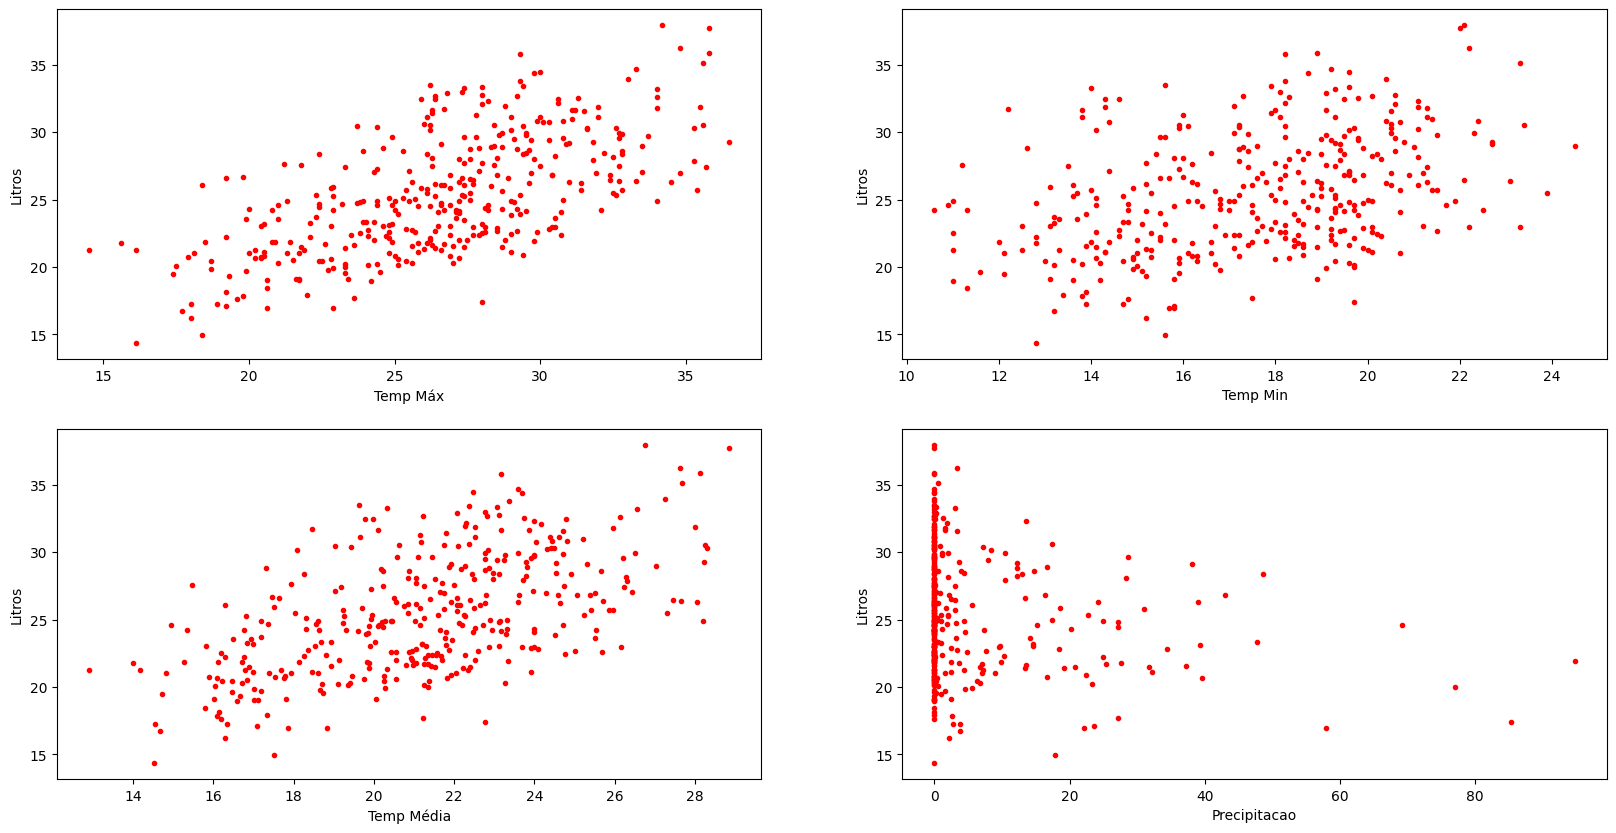

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.scatter( 'Temperatura Maxima (C)', 'Consumo de cerveja (litros)', data=dados, marker='.', color='red', linewidth=1)
plt.xlabel("Temp Máx")
plt.ylabel("Litros")

plt.subplot(2, 2, 2)
plt.scatter( 'Temperatura Minima (C)', 'Consumo de cerveja (litros)', data=dados, marker='.', color='red', linewidth=1)
plt.xlabel("Temp Min")
plt.ylabel("Litros")

plt.subplot(2, 2, 3)
plt.scatter( 'Temperatura Media (C)', 'Consumo de cerveja (litros)', data=dados, marker='.', color='red', linewidth=1)
plt.xlabel("Temp Média")
plt.ylabel("Litros")

plt.subplot(2, 2, 4)
plt.scatter( 'Precipitacao (mm)', 'Consumo de cerveja (litros)', data=dados, marker='.', color='red', linewidth=1)
plt.xlabel("Precipitacao")
plt.ylabel("Litros")

plt.show()

##### Particionando os dados

#### Hold-out

In [ ]:
from sklearn.model_selection import train_test_split
#70% treinamento 30% teste
X_train, X_test, y_train, y_test = train_test_split(X_dados_norm, y_dados, test_size=0.3, random_state=0)

In [ ]:
#Modelo básico de regressão
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

In [ ]:
#treinamento
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = linear_model.predict(X_test)

In [ ]:
#métricas comuns de desempenho: MSE e MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [ ]:
#desempenho em teste:
print("MSE:", MSE(y_test, y_predict))
print("MAE:", MAE(y_test, y_predict))

MSE: 5.867534822889128
MAE: 2.028821501005204


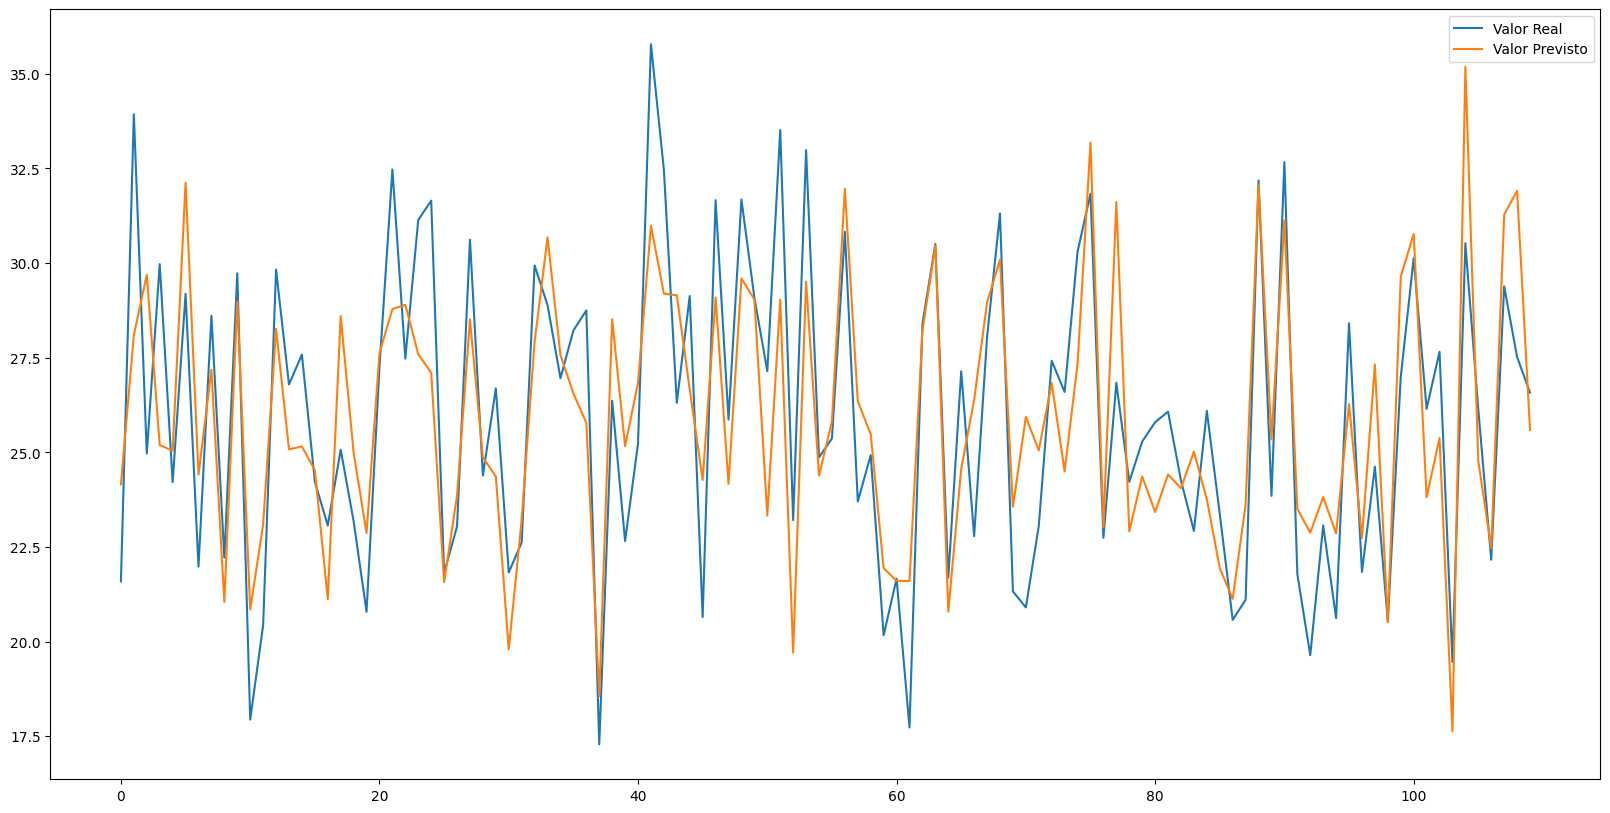

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='Valor Real')
plt.plot(y_predict, label = 'Valor Previsto')
plt.legend()
plt.show()

In [ ]:
real_predict_df = pd.DataFrame({'Valor Real': y_test, 'Previsto': y_predict})
real_predict_df

,Valor Real,Previsto
0,21.593,24.157555
1,33.930,28.101800
2,24.968,29.688444
3,29.972,25.194311
4,24.213,25.042135
...,...,...
105,26.127,24.765516
106,22.162,22.470057
107,29.386,31.278358
108,27.518,31.909319


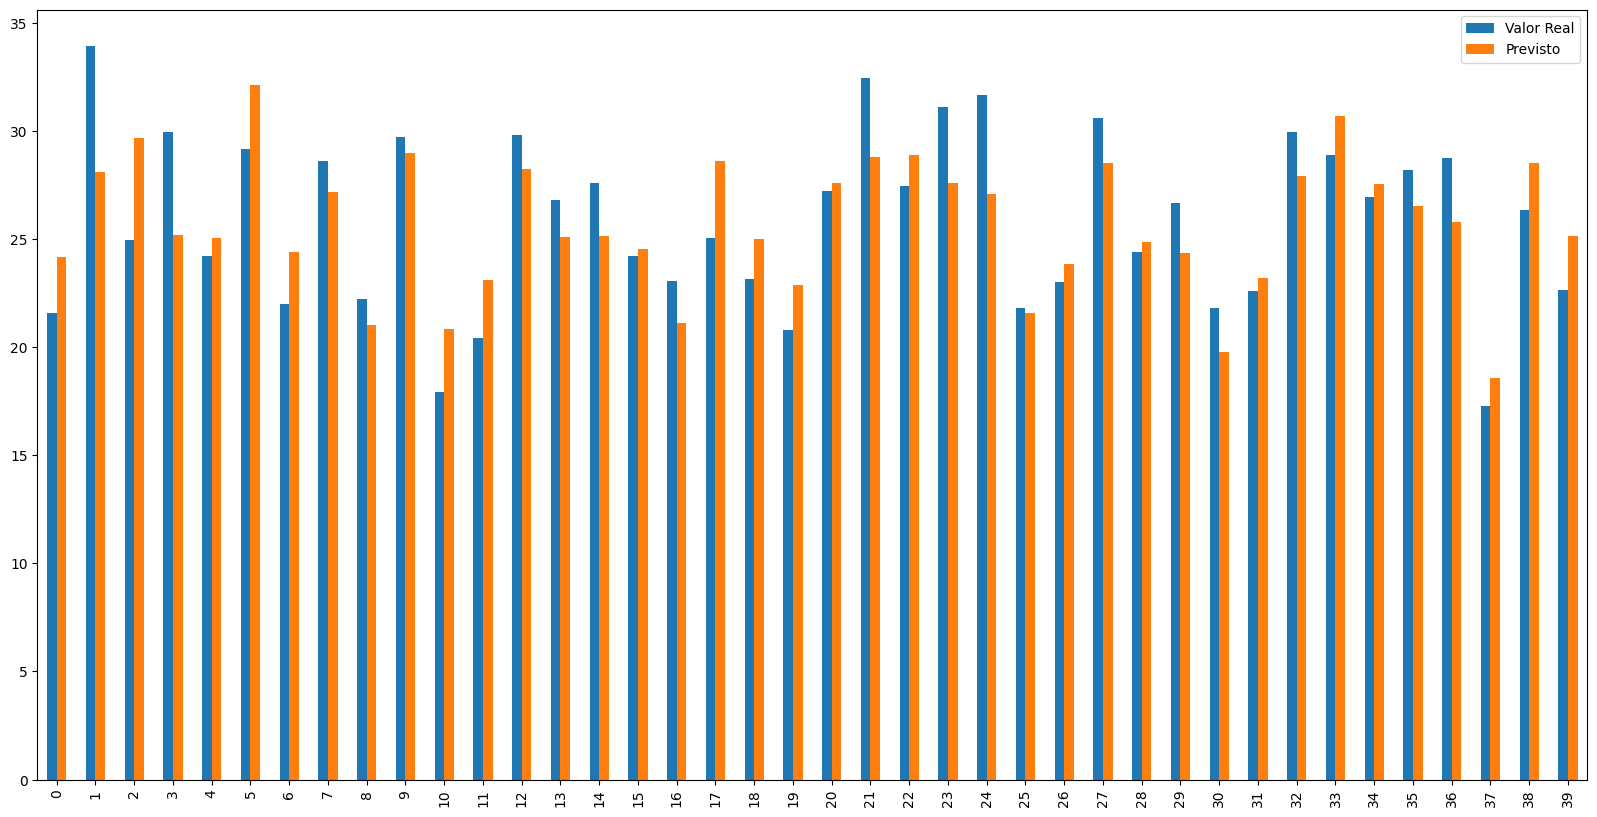

In [ ]:
real_predict_df.iloc[0:40,:].plot(kind='bar',figsize=(20,10))
plt.show()

##### Rede Neural

In [ ]:
#rede neural
from sklearn.neural_network import MLPRegressor

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Utilizando uma Rede Neural com gridsearch em treinamento

neuronios = [1, 10, 15, 20, 50, 100]
funcAtivacao = ['identity', 'logistic', 'tanh', 'relu']
algoTreinamento = ['lbfgs', 'sgd', 'adam']
taxaDeAprendizado = [0.001, 0.0001]

melhor_mse = np.Inf
melhor_modelo = None
num_exe = 5


for n in neuronios:
  for f in funcAtivacao:
    for a in algoTreinamento:
      for tx in taxaDeAprendizado:

        for i in range(0, num_exe):


          mlp = MLPRegressor (hidden_layer_sizes=n,  activation=f, solver=a, learning_rate_init=tx )
          mlp.fit(X_train, y_train)
          prev_train = mlp.predict(X_train)
          mse_train = MSE(y_train, prev_train)
          if mse_train < melhor_mse:
            melhor_mse = mse_train
            melhor_modelo = mlp
            print("MSE:", melhor_mse)

In [ ]:
mlp_selected = melhor_modelo

##### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
criterio = ["mse", "mae"]
splitter = ["best", "random"]
max_depth = [2,3, 5]
melhor_mse = np.Inf
for c in criterio:
  for s in splitter:
    for m in max_depth:

      tree = DecisionTreeRegressor(criterion=c, splitter=s, max_depth=m)
      tree.fit(X_train, y_train)
      prev_train = tree.predict(X_train)
      mse_train = MSE(y_train, prev_train)
      if mse_train < melhor_mse:
        melhor_mse = mse_train
        melhor_modelo = tree
        print("MSE:", melhor_mse)


In [ ]:
tree_selected = melhor_modelo

##### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
k_values = [10, 5, 3, 2]
metric = ['minkowski', 'euclidean']
melhor_mse = np.Inf
for k in k_values:
  for m in metric:
    knn = KNeighborsRegressor(n_neighbors=k, metric=m)
    knn.fit(X_train, y_train)
    prev_train = knn.predict(X_train)
    mse_train = MSE(y_train, prev_train)
    if mse_train < melhor_mse:
      melhor_mse = mse_train
      melhor_modelo = knn
      print("MSE:", melhor_mse)


In [ ]:
knn_selected = melhor_modelo

#### Teste

In [ ]:
#prev_mlp = mlp_selected.predict(X_test)
#prev_tree = tree_selected.predict(X_test)
#prev_knn = knn_selected.predict(X_test)
prev_linear = linear_model.predict(X_test)

In [ ]:
'''
print('MLP results:')
print("MSE:", MSE(y_test, prev_mlp))
print("MAE:", MAE(y_test, prev_mlp))
print('Tree results:')
print("MSE:", MSE(y_test, prev_tree))
print("MAE:", MAE(y_test, prev_tree))
print('KNN results:')
print("MSE:", MSE(y_test, prev_knn))
print("MAE:", MAE(y_test, prev_knn))
'''
print('Reg. Linear results:')
print("MSE:", MSE(y_test, prev_linear))
print("MAE:", MAE(y_test, prev_linear))

Reg. Linear results:
MSE: 5.867534822889128
MAE: 2.028821501005204
